In [69]:
import mdtraj
import numpy as np
import os
import matplotlib.pyplot as plt

In [70]:
def gen_phi_psi_scatter(phis, psis, names, topol):
    for i in range(len(phis)):
        plt.scatter(phis[i].flatten(), psis[i].flatten(), alpha=0.25, s=0.5, label=names[i])
    plt.xlabel("Dihedral Phi")
    plt.ylabel("Dihedral Psi")
    plt.title("Ramachandran Plots for Diff Analysis Methods of {}".format(topol))
    legend = plt.legend(markerscale=5)
    for lh in legend.legendHandles:
        lh.set_alpha(1)
    
    plt.savefig("./Figures/ramachandran_{}.png".format(topol))
    plt.show()
    return 

In [71]:
md_A_data = mdtraj.load('./Inputs/topolA/topolA_20ns.xtc', top='./Inputs/topolA/dialaA.pdb')
phi_A_md = mdtraj.compute_phi(md_A_data, periodic=True, opt=True)[1]
psi_A_md = mdtraj.compute_psi(md_A_data, periodic=True, opt=True)[1]

colvar_A_data = np.loadtxt("./Inputs/topolA/topolA_20ns_colvar")
phi_A_colvar = colvar_A_data[:, 1]
psi_A_colvar = colvar_A_data[:, 2]

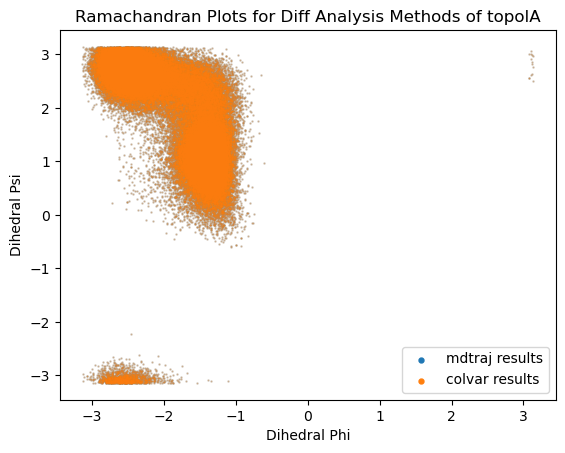

In [72]:
gen_phi_psi_scatter([phi_A_md, phi_A_colvar], 
                    [psi_A_md, psi_A_colvar], 
                    ["mdtraj results", "colvar results"], 
                    "topolA")

In [73]:
md_B_data = mdtraj.load('./Inputs/topolB/topolB_20ns.xtc', top='./Inputs/topolB/dialaB.pdb')
phi_B_md = mdtraj.compute_phi(md_B_data, periodic=True, opt=True)[1]
psi_B_md = mdtraj.compute_psi(md_B_data, periodic=True, opt=True)[1]

colvar_B_data = np.loadtxt("./Inputs/topolB/topolB_20ns_colvar")
phi_B_colvar = colvar_B_data[:, 1]
psi_B_colvar = colvar_B_data[:, 2]

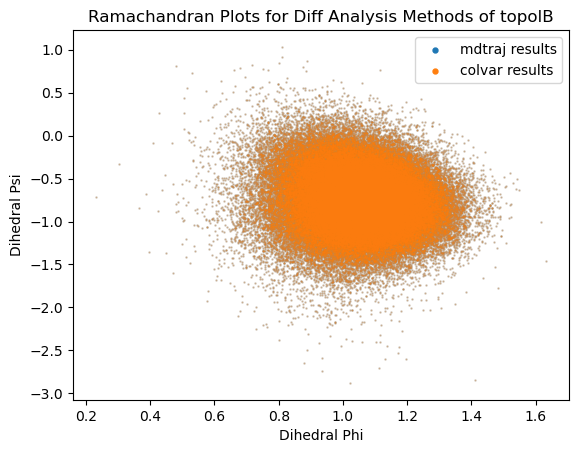

In [74]:
gen_phi_psi_scatter([phi_B_md, phi_B_colvar], 
         [psi_B_md, psi_B_colvar],
         ["mdtraj results", "colvar results"], 
         "topolB")

In [75]:
phi_A_std = np.std(phi_A_md)
psi_A_std = np.std(psi_A_md)
phi_B_std = np.std(phi_B_md)
psi_B_std = np.std(psi_B_md)
# print(phi_B_std, psi_B_std, phi_A_std, psi_A_std)

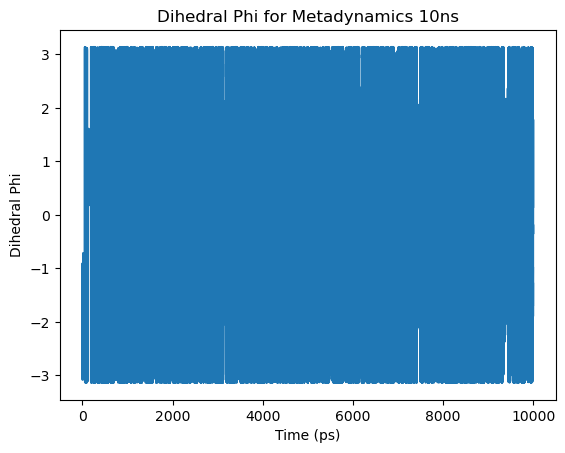

In [76]:
colvar_A_meta_data = np.loadtxt("./Inputs/topolA_meta/topolA_meta_colvar")
phi_A_meta_colvar = colvar_A_meta_data[:, 1]
x_A_meta_colvar = colvar_A_meta_data[:, 0]

plt.plot(x_A_meta_colvar, phi_A_meta_colvar)
plt.xlabel("Time (ps)")
plt.ylabel("Dihedral Phi")
plt.title("Dihedral Phi for Metadynamics 10ns")
plt.savefig("./Figures/phi_meta_10ns.png")
plt.show()

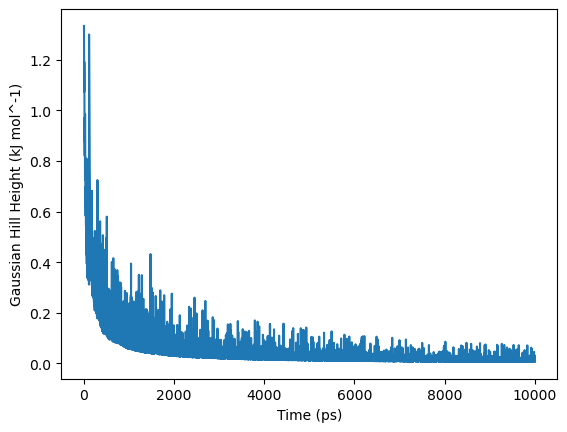

In [77]:
hills_A_meta_data = np.loadtxt("./Inputs/topolA_meta/HILLS")
time_meta_hills = hills_A_meta_data[:, 0]
heights_meta_hills = hills_A_meta_data[:, 3]

plt.plot(time_meta_hills, heights_meta_hills)
plt.xlabel("Time (ps)")
plt.ylabel("Gaussian Hill Height (kJ mol^-1)")
plt.savefig("./Figures/gauss_hill_meta.png")
plt.show()

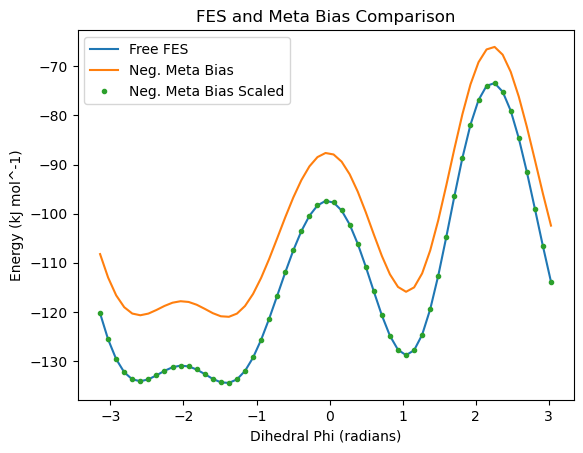

In [78]:
grid_meta_data = np.loadtxt('./Inputs/topolA_meta/topolA_meta.grid.dat')
meta_bias = grid_meta_data[:,1]
fes_meta_data = np.loadtxt('./Inputs/topolA_meta/fes.dat')
free_fes = fes_meta_data[:,1]

phi_meta_bias = grid_meta_data[:,0]
phi_fes = fes_meta_data[:,0]

plt.plot(phi_fes, free_fes, label="Free FES")
plt.plot(phi_meta_bias, -meta_bias, label="Neg. Meta Bias")
plt.plot(phi_meta_bias, [-i/0.9 for i in meta_bias], ".", label="Neg. Meta Bias Scaled")

plt.xlabel("Dihedral Phi (radians)")
plt.ylabel("Energy (kJ mol^-1)")
plt.title("FES and Meta Bias Comparison")
plt.legend()
plt.savefig("./Figures/fes_negenergy_meta.png")
plt.show()

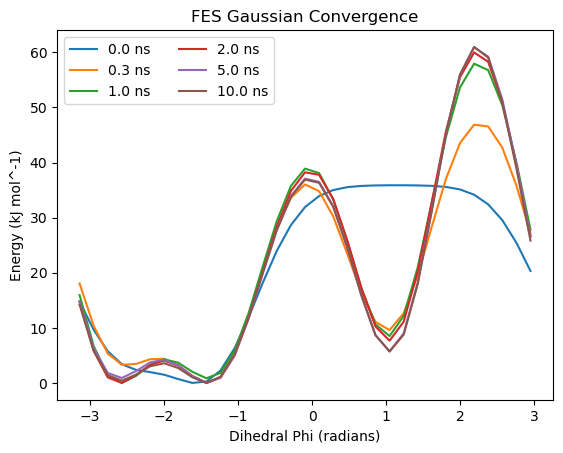

In [79]:
for i in [0, 3, 10, 20, 50, 100]:
    file = './Inputs/topolA_meta/fes/fes_{}.dat'.format(i)
    fes_meta_data = np.loadtxt(file)
    free_fes = fes_meta_data[:,1]
    phi_fes = fes_meta_data[:,0]

    plt.plot(phi_fes, free_fes, label="{} ns".format(i/10))
    
plt.xlabel("Dihedral Phi (radians)")
plt.ylabel("Energy (kJ mol^-1)")
plt.title("FES Gaussian Convergence")
plt.legend(ncols = 2)
plt.savefig("./Figures/fes_convergence_meta.png")
plt.show()

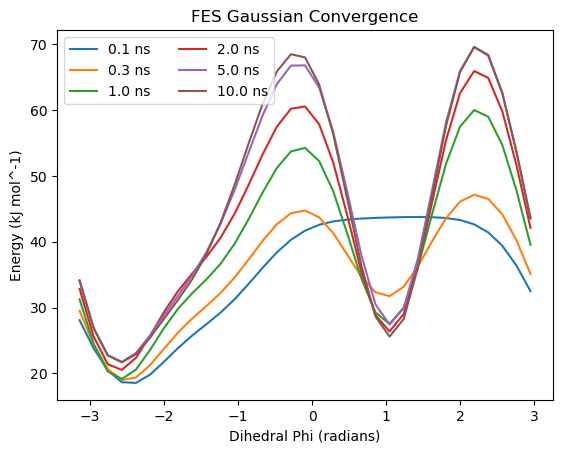

In [81]:
for i in [1, 3, 10, 20, 50, 100]:
    file = './Inputs/topolA_meta_2D/fes/fes_{}.dat'.format(i)
    fes_meta_2d_data = np.loadtxt(file)
    free_fes_2d = fes_meta_2d_data[:,2]
    phi_fes_2d = fes_meta_2d_data[:,0]
    psi_fes_2d = fes_meta_2d_data[:,1]

    indices = np.where(-2.7 < psi_fes_2d, psi_fes_2d, 0)
    indices = np.where(indices < -2.4, True, False)
    
    plt.plot(phi_fes_2d[indices], free_fes_2d[indices], label="{} ns".format(i/10))
    
plt.xlabel("Dihedral Phi (radians)")
plt.ylabel("Energy (kJ mol^-1)")
plt.title("FES Gaussian Convergence")
plt.legend(ncols = 2)
plt.savefig("./Figures/fes_convergence_meta_2d.png")
plt.show()

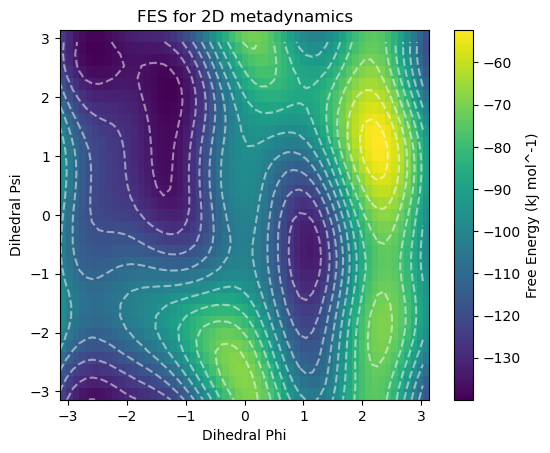

In [80]:
grid_meta_2d_data = np.loadtxt('./Inputs/topolA_meta_2D_40ns/topolA_meta_2D_40ns.grid.dat')
phi_meta_2d_bias = grid_meta_2d_data[:,0]
psi_meta_2d_bias = grid_meta_2d_data[:,1]
meta_2d_bias = grid_meta_2d_data[:,2]
meta_2d_bias = np.divide(-meta_2d_bias, 0.9)
meta_2d_bias = np.reshape(meta_2d_bias, (len(np.unique(psi_meta_2d_bias)), len(np.unique(phi_meta_2d_bias)))).T

c = plt.imshow(np.rot90(meta_2d_bias),
               extent=[-np.pi, np.pi, -np.pi, np.pi],
               cmap='viridis')

X, Y = np.meshgrid(np.unique(phi_meta_2d_bias), np.unique(psi_meta_2d_bias))
plt.contour(X, Y,
           meta_2d_bias.T,
           10, colors='white', alpha=0.5)

plt.xlabel("Dihedral Phi")
plt.ylabel("Dihedral Psi")
plt.colorbar(c, label="Free Energy (kJ mol^-1)")
plt.savefig("./Figures/fes_meta_2d.png")
plt.title("FES for 2D metadynamics")
plt.show()